In [1]:
import numpy as np
import json
import matplotlib.pyplot as plt
import os
from utils import evaluate_binary_scorer, evaluate_binary_scorer_fold
import warnings

warnings.filterwarnings("ignore")


## Evaluating a model

### Evaluating on one fold

Output the predictions your model made to a JSON file of the form

```json
{
  "y_true": [],
  "y_pred": [],
  "y_score": []
}
```


In [2]:
# Replace this with the path to your JSON file
input_path = os.path.join("data", "eval_results", "logreg_tfidf_care_test.json")
with open(input_path, "r") as f:
    results_test = json.load(f)
results_test = evaluate_binary_scorer_fold(**results_test)

In [3]:
results_test.keys()

dict_keys(['accuracy', 'precision', 'recall', 'f1', 'roc_curve', 'pr_curve'])

In [4]:
print(f"Precision: {results_test['precision']:.2f}")
print(f"Recall   : {results_test['recall']:.2f}")
print(f"F-1      : {results_test['f1']:.2f}")

Precision: 0.60
Recall   : 0.22
F-1      : 0.32


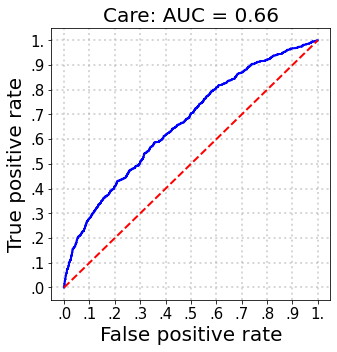

In [5]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1, 1, 1)

# ROC curve
fpr = results_test["roc_curve"]["fpr"]
tpr = results_test["roc_curve"]["tpr"]
auc = results_test["roc_curve"]["auc"]

ax.plot(fpr, tpr, lw=2, alpha=1, c="b")
ax.plot([0, 1], [0, 1], linestyle='--', linewidth=2, c='r')
ax.grid(alpha=0.5, linestyle=':', linewidth=2)

# Customize x ticks
ax.set_xticks(np.arange(0, 1.1, 0.1))
ax.set_xticklabels(labels=list(map(lambda x: str(x)[1:3] if x < 1 else str(x)[0:2],
                                   np.arange(0, 1.1, 0.1))),
                   fontdict={"fontsize": 15})

# Customize y ticks
ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.set_yticklabels(labels=list(map(lambda x: str(x)[1:3] if x < 1 else str(x)[0:2],
                                   np.arange(0, 1.1, 0.1))),
                   fontdict={"fontsize": 15})

ax.set_xlabel("False positive rate", size=20)
ax.set_ylabel("True positive rate", size=20)

ax.set_title(f"Care: AUC = {auc:.2f}", size=20)
plt.show()

### Evaluating on k folds

Output the predictions your model made to a JSON file of the form

```json
[
  {
    "y_true": [],
    "y_pred": [],
    "y_score": []
  }
]
```
Each dictionary in this list corresponds to predictions and ground-truth labels in one fold.

In [6]:
# Replace this with the path to your JSON file
input_path = os.path.join("data", "eval_results", "logreg_tfidf_authority_crossval.json")
# Load cross validation and test results
with open(input_path, "r") as f:
    results_crossval = json.load(f)

# Calculate evaluation metrics
results_crossval = evaluate_binary_scorer(results_crossval)

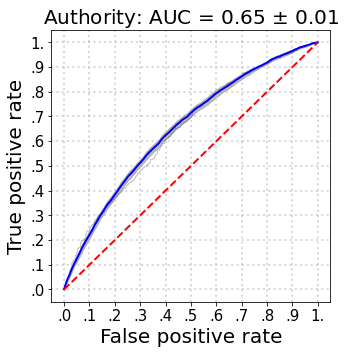

In [7]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1, 1, 1)

# Plot the ROC curve for every fold
for r in results_crossval["fold_results"]:
    fpr, tpr = r["roc_curve"]["fpr"], r["roc_curve"]["tpr"]
ax.plot(fpr, tpr, lw=1, alpha=0.2, c="k")

# Plot the ROC curve averaged over all folds
fpr = results_crossval["aggregate"]["roc_curve"]["fpr"]
tpr = results_crossval["aggregate"]["roc_curve"]["tpr"]
ax.plot(fpr, tpr, lw=2, alpha=1, c="b")

# Also plot the confidence intervals
tpr_lower = results_crossval["aggregate"]["roc_curve"]["tpr_ci_lower"]
tpr_ci_upper = results_crossval["aggregate"]["roc_curve"]["tpr_ci_upper"]
ax.fill_between(fpr, tpr_lower, tpr_ci_upper,
                color='grey', alpha=0.5)

ax.plot([0, 1], [0, 1], linestyle='--', linewidth=2, c='r')
ax.grid(alpha=0.5, linestyle=':', linewidth=2)

# Customize x ticks
ax.set_xticks(np.arange(0, 1.1, 0.1))
ax.set_xticklabels(labels=list(map(lambda x: str(x)[1:3] if x < 1 else str(x)[0:2],
                                   np.arange(0, 1.1, 0.1))),
                   fontdict={"fontsize": 15})

# Customize y ticks
ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.set_yticklabels(labels=list(map(lambda x: str(x)[1:3] if x < 1 else str(x)[0:2],
                                   np.arange(0, 1.1, 0.1))),
                   fontdict={"fontsize": 15})

ax.set_xlabel("False positive rate", size=20)
ax.set_ylabel("True positive rate", size=20)

# Add average AUC and standard deviation of AUC to plot
auc = results_crossval["aggregate"]["roc_curve"]["auc"]
auc_sd = results_crossval["aggregate"]["roc_curve"]["auc_sd"]
ax.set_title(f"Authority: AUC = {auc:.2f} $\\pm$ {auc_sd:.2f}", size=20)
plt.show()